# Linear Regression


## Introduction
linear regression is a model which estimates the linear relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data.

## Dataset
The Wine Quality dataset is available for both red and white variants of Vinho Verde wine, but the most commonly used variant in studies is the red wine dataset. Here are the key attributes:
- Fixed Acidity: Most acids involved with wine are fixed or nonvolatile (do not evaporate readily).
- Volatile Acidity: The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.
- Citric Acid: Found in small quantities, citric acid can add 'freshness' and flavor to wines.
- Residual Sugar: The amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.
- Chlorides: The amount of salt in the wine.
- Free Sulfur Dioxide: The free form of SO₂ exists in equilibrium between molecular SO₂ (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.
- Total Sulfur Dioxide: The amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.
- Density: The density of wine is close to that of water depending on the percent alcohol and sugar content.
- pH: Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
- Sulphates: A wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.
- Alcohol: The percent alcohol content of the wine.
- Quality (Target Variable): Output variable (based on sensory data, scored between 0 and 10).

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')

# Display the first few rows of the dataset
print(data.head())

# Prepare the data
X = data.drop('quality', axis=1).values
y = data['quality'].values.reshape(-1, 1) 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [17]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for gradient descent efficiency
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a bias term (intercept) to the features
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


In [18]:
# Batch Gradient Descent
def batch_gradient_descent(X, y, lr=0.1, iterations=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    mse_history = []
    for iteration in range(iterations):
        gradients = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= lr * gradients
        mse_history.append(mean_squared_error(y, X.dot(theta)))
    return theta, mse_history

# Train the models
theta_bgd, mse_history_bgd = batch_gradient_descent(X_train_scaled, y_train)
# Predictions
y_pred_bgd = X_test_scaled.dot(theta_bgd)
# Evaluate MSE
mse_bgd = mean_squared_error(y_test, y_pred_bgd)


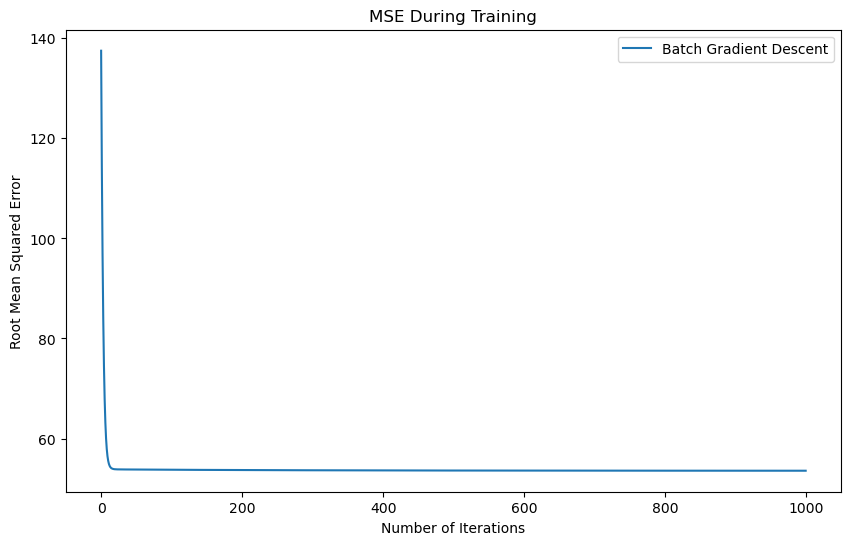

Final RMSE for Batch Gradient Descent:  53.8080278979246


In [8]:
# Plotting MSE histories
plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(mse_history_bgd), label='Batch Gradient Descent')
plt.title('MSE During Training')
plt.xlabel('Number of Iterations')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

# Print final MSE values for comparison
print("Final RMSE for Batch Gradient Descent: ", np.sqrt(mse_bgd))

In [19]:
# Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, lr=0.01, epochs=50, t0=10, t1=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    mse_history = []
    def learning_schedule(t):
        return t0 / (t + t1)
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta -= eta * gradients
            if epoch % 5 == 0:
                mse_history.append(mean_squared_error(y, X.dot(theta)))
    return theta, mse_history

# Train the models
theta_sgd, mse_history_sgd = stochastic_gradient_descent(X_train_scaled, y_train)

# Predictions
y_pred_sgd = X_test_scaled.dot(theta_sgd)

# Evaluate MSE
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

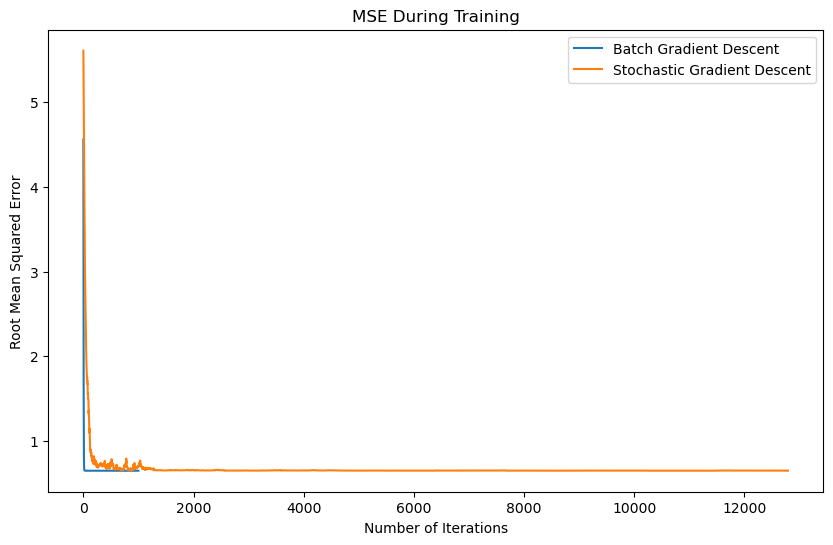

Final RMSE for Batch Gradient Descent:  0.6245199282635697
Final RMSE for Stochastic Gradient Descent:  0.6249412370465


In [20]:
# Plotting MSE histories
plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(mse_history_bgd), label='Batch Gradient Descent')
plt.plot(np.sqrt(mse_history_sgd), label='Stochastic Gradient Descent')
plt.title('MSE During Training')
plt.xlabel('Number of Iterations')
plt.ylabel('Root Mean Squared Error')
plt.legend()
plt.show()

# Print final MSE values for comparison
print("Final RMSE for Batch Gradient Descent: ", np.sqrt(mse_bgd))
print("Final RMSE for Stochastic Gradient Descent: ", np.sqrt(mse_sgd))

## Result Analysis

From the plot of MSE, we can see the reslut seems to be same.But there are some difference between two:

### Computational Efficiency
- **BGD** calculates the gradient over the entire dataset, which can be very time-consuming for large datasets.
- **SGD** updates the model parameters using only a single sample (or a small batch in mini-batch SGD) at each iteration, which drastically reduces the computational overhead, thus allowing for faster iterations.

### Memory Efficiency
- **BGD** might encounter memory limitations on large datasets because it requires the entire dataset to be loaded into memory for gradient computation.
- **SGD** processes only a single data point at a time for gradient updates, which significantly lowers memory requirements compared to BGD.

### Convergence
- **BGD** can get stuck in local minima or saddle points, especially when dealing with non-convex optimization problems.
- **SGD**, due to its high variance in updates, has a better chance of escaping local optima, potentially leading to better solutions in global terms.

### Adaptability to Non-stationary Data (Dynamic Environments)
- **BGD** is less flexible in dynamic environments where the data keeps changing because it needs to see the entire dataset to update the model.
- **SGD** can adapt more flexibly to changes in data since it can adjust the model incrementally with the arrival of new data samples.
